In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from scipy import stats
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# Load and inspect the data
df = pd.read_csv("apple_stock.csv")
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Remove outliers using Z-score
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df[filtered_entries]

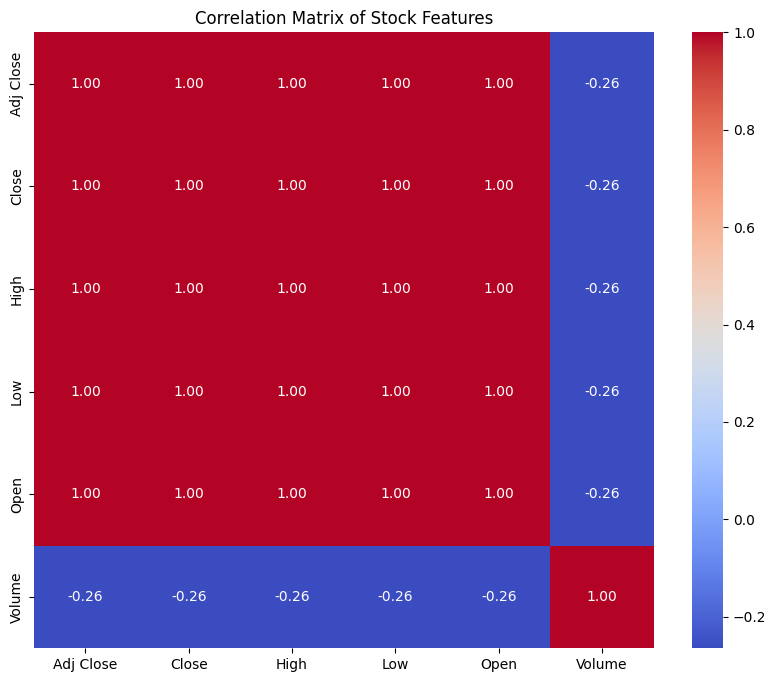

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df_new.drop(columns=['Date']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Stock Features")
plt.show()

In [7]:
# Interactive line plot for High prices
fig = px.line(df_new, x='Date', y='High', title='High Prices Over Time', markers=True)
fig.show()

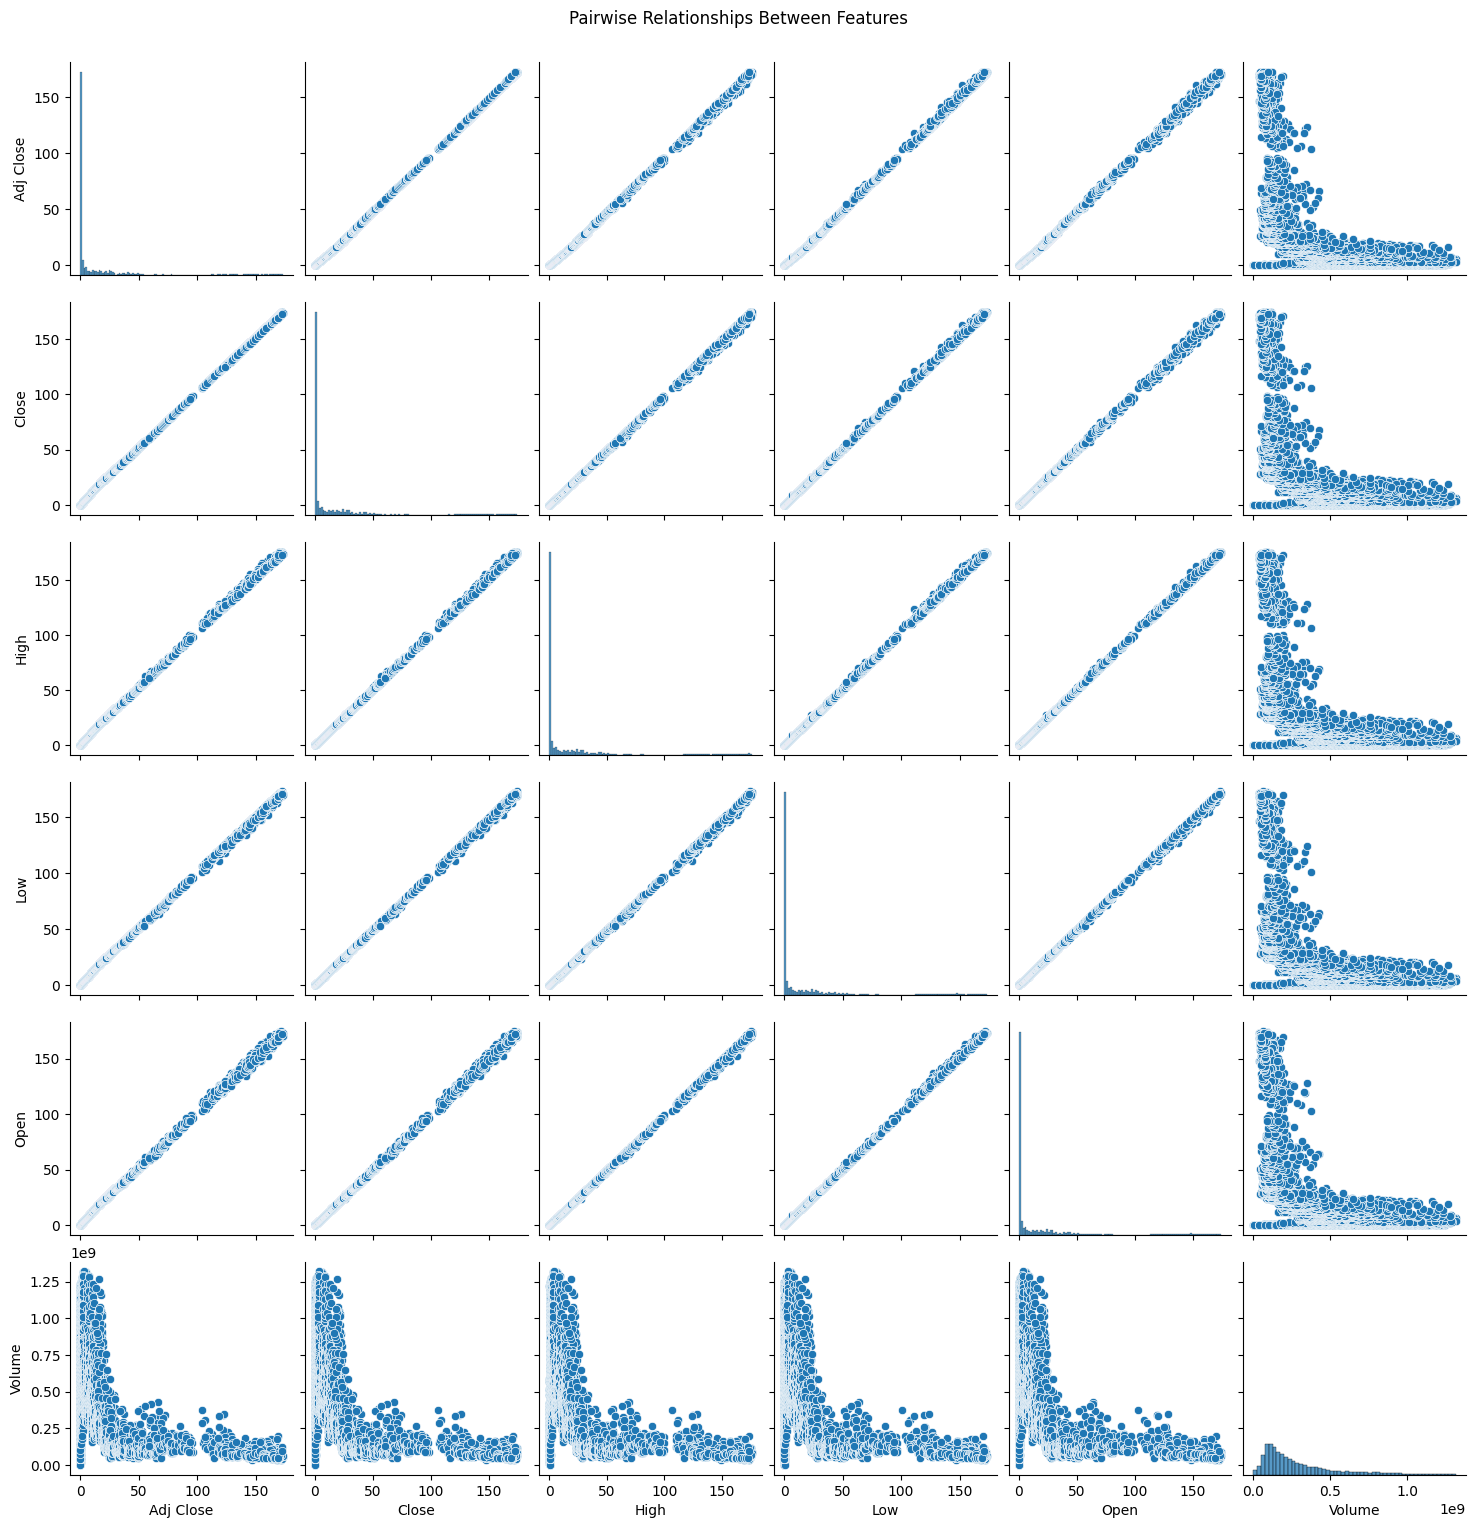

In [8]:
# Pairplot to visualize relationships
sns.pairplot(df_new.drop(columns=['Date']))
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

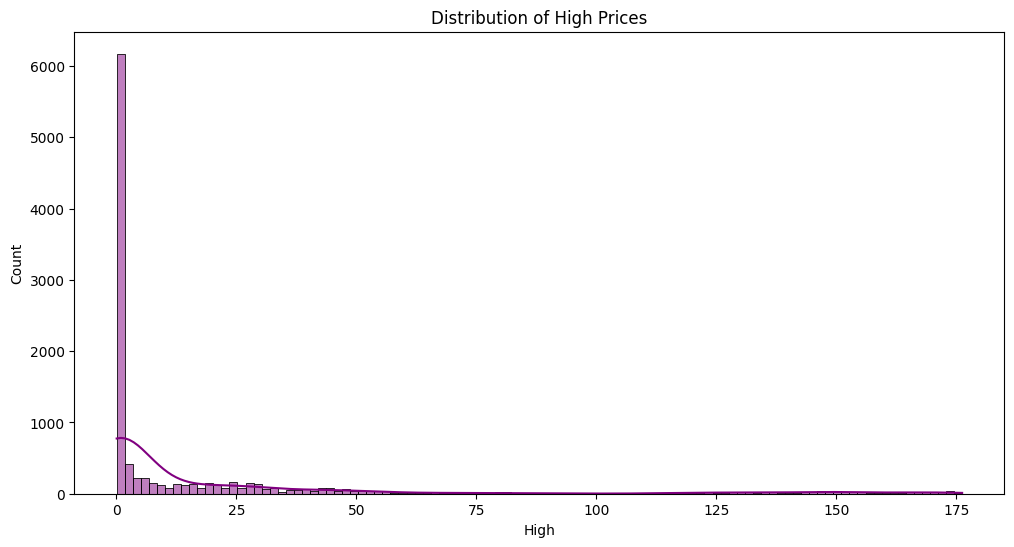

In [9]:
# Distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(df_new['High'], kde=True, color='purple')
plt.title("Distribution of High Prices")
plt.show()

In [10]:
import plotly.graph_objects as go

# Candlestick chart for better financial visualization
fig = go.Figure(data=[go.Candlestick(x=df_new['Date'],
									 open=df_new['Open'],
									 high=df_new['High'],
									 low=df_new['Low'],
									 close=df_new['Close'])])
fig.update_layout(title='Candlestick Chart of Apple Stock', xaxis_title='Date', yaxis_title='Price')
fig.update_traces(increasing_line_width=2, decreasing_line_width=2)
fig.update_layout(
    xaxis_rangeslider_visible=False, 
    xaxis=dict(
        showgrid=True,
        zeroline=False,
    ),
    yaxis=dict(
        showgrid=True,
        zeroline=False,
    ),
    title_font=dict(size=20), 
    title_x=0.5 
)
fig.show()

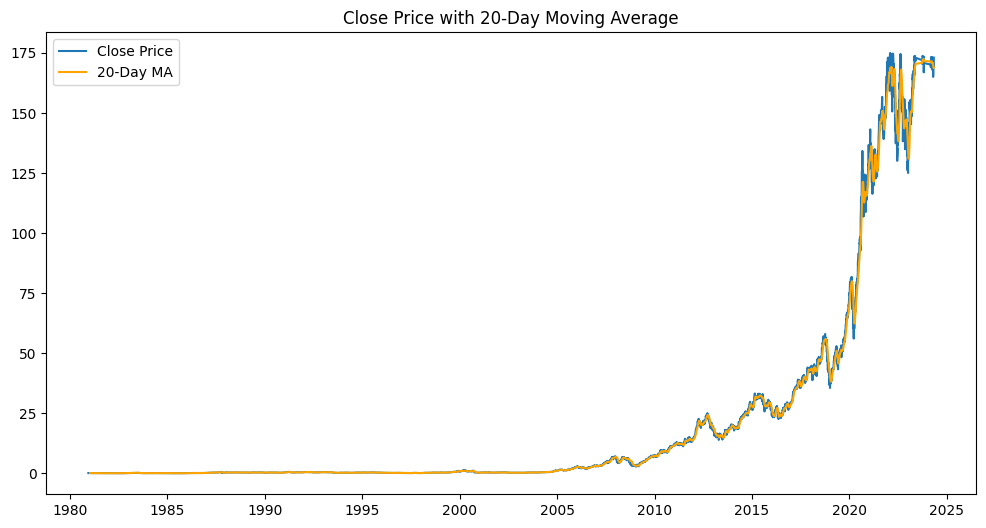

In [11]:
# Moving average plot
df_new['MA20'] = df_new['Close'].rolling(window=20).mean()
plt.figure(figsize=(12, 6))
plt.plot(df_new['Date'], df_new['Close'], label='Close Price')
plt.plot(df_new['Date'], df_new['MA20'], label='20-Day MA', color='orange')
plt.title("Close Price with 20-Day Moving Average")
plt.legend()
plt.show()

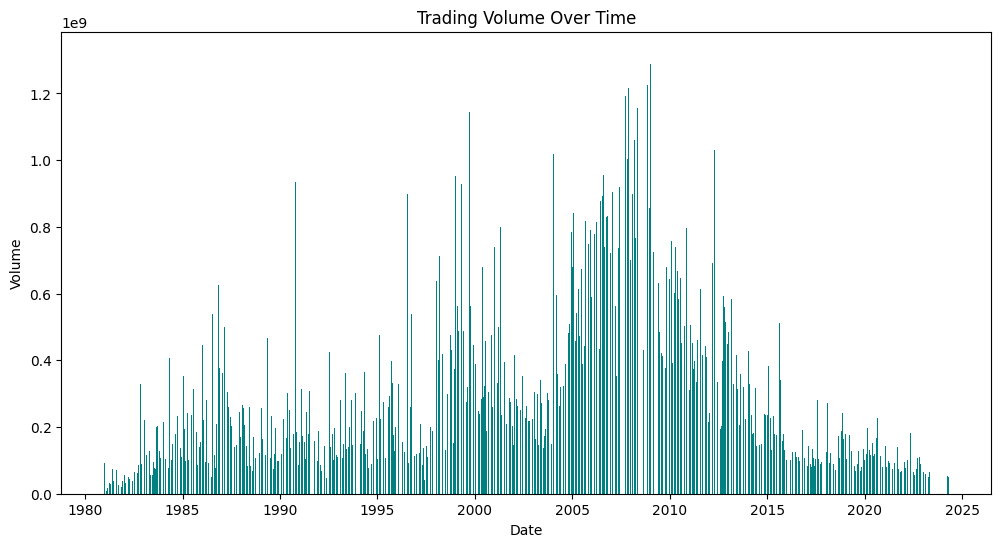

In [12]:
# Volume over time plot
plt.figure(figsize=(12, 6))
plt.bar(df_new['Date'], df_new['Volume'], color='teal')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [13]:
# Feature and target split
x = df_new.loc[:, ['Adj Close', 'Close', 'High', 'Low']]
y = df_new['Open']

In [14]:
# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [16]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [19]:
def evaluate_model(model, name):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Model - R2 Score: {r2*100:.2f}% | MSE: {mse:.4f}")

In [20]:
# Model evaluation
print("\nModel Performance:")
evaluate_model(lr, "Linear Regression")
evaluate_model(rf, "Random Forest")
evaluate_model(gb, "Gradient Boosting")


Model Performance:
Linear Regression Model - R2 Score: 99.99% | MSE: 0.0763
Random Forest Model - R2 Score: 99.99% | MSE: 0.1156
Gradient Boosting Model - R2 Score: 99.99% | MSE: 0.1685


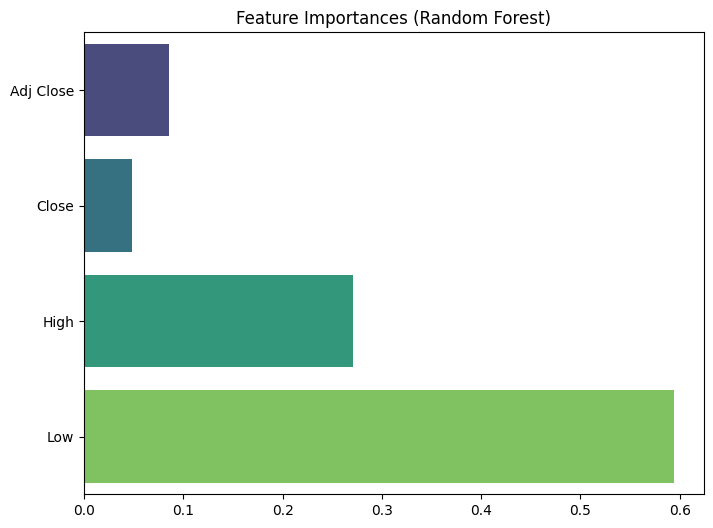

In [21]:
# Summary plot for feature importances from Random Forest
importances = rf.feature_importances_
features = ['Adj Close', 'Close', 'High', 'Low']
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importances (Random Forest)")
plt.show()